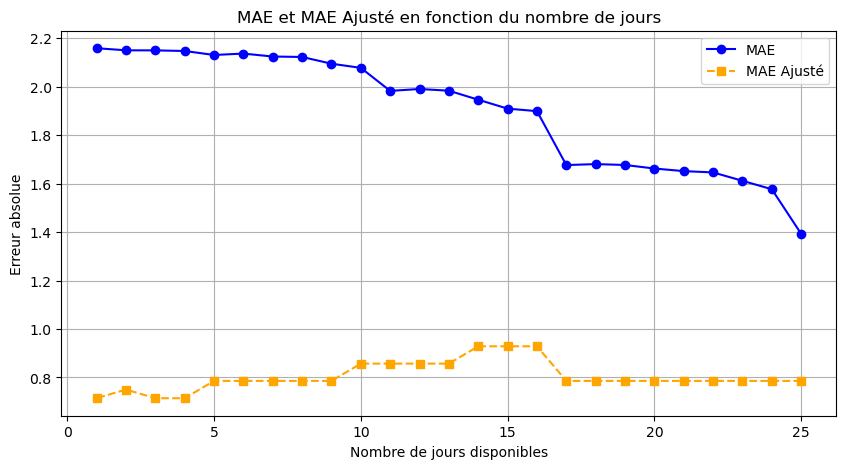

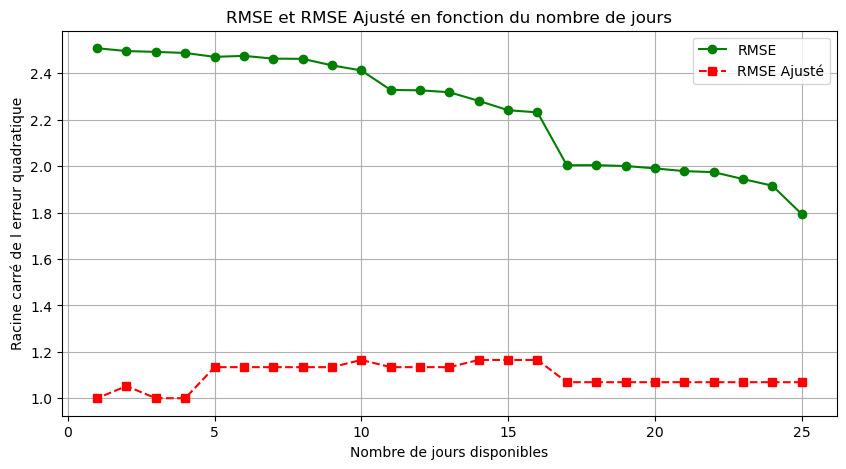

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from predict import PREDICT23, PREDICT24, MAE, RMSE, MAE_ajuste, RMSE_ajuste, X

# On créer une variable qui représentera la nombre de jour utilisé pour prédire le classement
y = np.linspace(25, 1, num=25)  

# On trace un premier graphe contenant l'erreur e valeur absolue  (MAE et MAE ajusté)
plt.figure(figsize=(10, 5))
plt.plot(y, MAE, label='MAE', marker='o', linestyle='-', color='blue')
plt.plot(y, MAE_ajuste, label='MAE Ajusté', marker='s', linestyle='--', color='orange')
plt.xlabel('Nombre de jours disponibles')
plt.ylabel('Erreur absolue')
plt.title('MAE et MAE Ajusté en fonction du nombre de jours')
plt.legend()
plt.grid(True)
plt.show()

# On trace un deuxième graphe pour la racine carré de l'erreur quadratique (RMSE et RMSE ajusté)
plt.figure(figsize=(10, 5))
plt.plot(y, RMSE, label='RMSE', marker='o', linestyle='-', color='green')
plt.plot(y, RMSE_ajuste, label='RMSE Ajusté', marker='s', linestyle='--', color='red')
plt.xlabel('Nombre de jours disponibles')
plt.ylabel('Racine carré de l erreur quadratique')
plt.title('RMSE et RMSE Ajusté en fonction du nombre de jours')
plt.legend()
plt.grid(True)
plt.show()


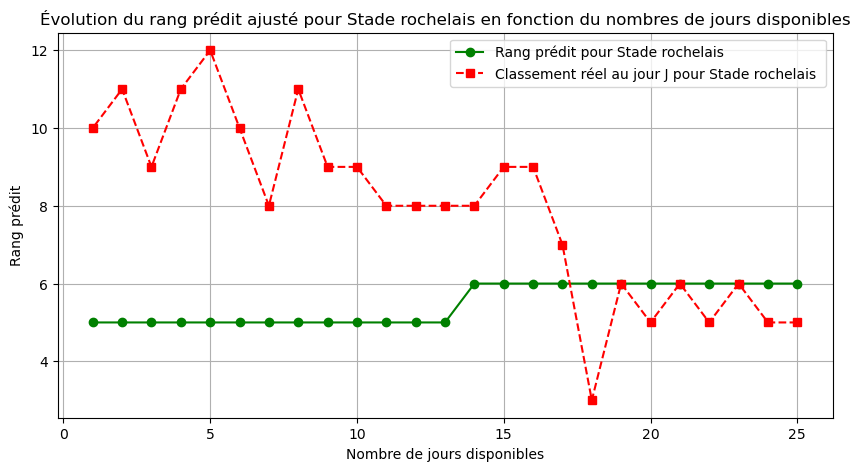

In [ ]:
# On va maintenant créer une fonction qui permet de tracer l'évolution du classement prédit d'une équipe en fonction du nombre de jours disponibles :
import pandas as pd
def evol_classement_prédit(Nom_de_léquipe,année): # On choisit l'équipe que l'on veut et l'année pour qu'on puisse choisir les bon tableaux contenant les prédictions : PREDICT23 pour l'année 2023 et PREDICT24 pour l'année 2024
    val_pred = []
    for i in range(25):
        tab = eval(f"PREDICT{année % 2000}")
        df = tab[i] # i représente le nombre de jours que l'on a pas pour faire la prédiction
        # On filtre pour obtenir le classement prédit de l'équipe que l'on souhaite
        rang_pred_adjusté = df.loc[df['Club'] == Nom_de_léquipe, 'Rang_prédit_ajusté'].values[0]
        val_pred.append(rang_pred_adjusté )
    # On crée une variable qui représentera la nombre de jour utilisé pour prédire le classement
    y = np.linspace(25, 1, num=25)  
     # On veut aussi comparer le classement prédit avec les k premiers jours avec le classement du k_ème jour :
    val_réel = []
    tab2 = X[(X['année'] == année) & (X['Club'] == Nom_de_léquipe) ].reset_index(drop=True) 
    for i in range(25,0,-1):
        val_réel.append(tab2[f'J{i}_x'])

         
    plt.figure(figsize=(10, 5))
    plt.plot(y, val_pred, label=f'Rang prédit pour {Nom_de_léquipe}', marker='o', linestyle='-', color='green')
    plt.plot(y, val_réel, label=f'Classement réel au jour J pour {Nom_de_léquipe} ', marker='s', linestyle='--', color='red')
    plt.xlabel('Nombre de jours disponibles')
    plt.ylabel('Rang prédit')
    plt.title(f'Évolution du rang prédit ajusté pour {Nom_de_léquipe} en fonction du nombres de jours disponibles')
    plt.legend()
    plt.grid(True)
    plt.show()
evol_classement_prédit('Stade rochelais', 2023) 

